In [1]:
import base64
import io
import os
from pprint import pprint

from functions import *

In [2]:
TOKEN = 'github_users'
auth_header = {'Content-Type' : 'application/json',
               'Authorization': f'{TOKEN}'}
BASE_URL_PARSER = f'http://localhost:5001/'

# Original image

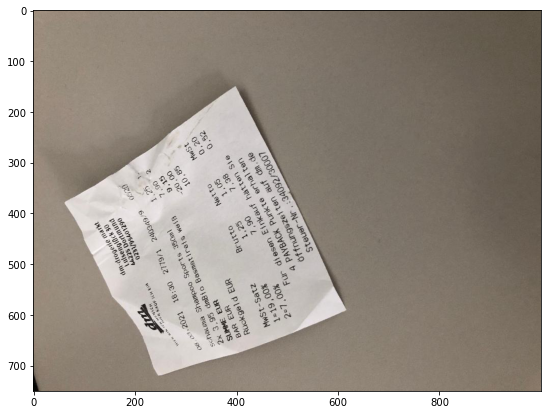

In [13]:
img = r'./dm.jpg'
assert os.path.exists(img), 'file does not exist'
_ = show_image(img)

# Parsing the original image as is

In [4]:
res = perform_query(BASE_URL_PARSER, 'parse', 'GET', headers=auth_header, data={"image": get_image_content(img)})
res['data'].pop('raw_text')
pprint(res)

{'data': {'amount': None,
          'amountexvat': None,
          'date': None,
          'hash': '01afac35-d12d-4f5a-bcb6-2885c725239f',
          'merchant_name': 'DM',
          'rotation': -68}}


# Detecting edges

In [5]:
res_edges = perform_query(BASE_URL_PARSER, 'detect_edges', 'GET', headers=auth_header, 
                    data={"image": get_image_content(img)})
res_edges

{'data': [[61, 381], [399, 150], [615, 591], [244, 718]]}

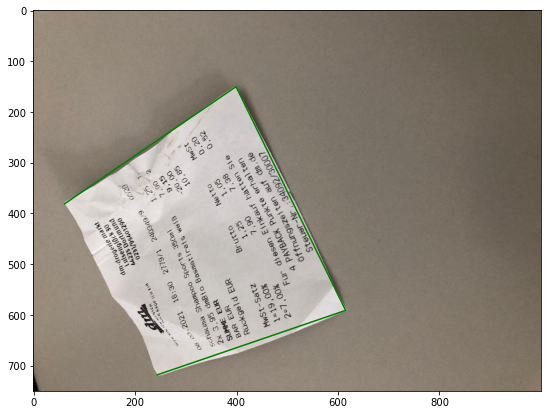

In [10]:
ax = show_image(img)
show_edges(ax, res_edges['data'])

# Bird view of the image

In [7]:
res_bird_view = perform_query(BASE_URL_PARSER, 'bird_view', 'GET', headers=auth_header, 
                    data={"image": get_image_content(img), 'points': res_edges['data']})

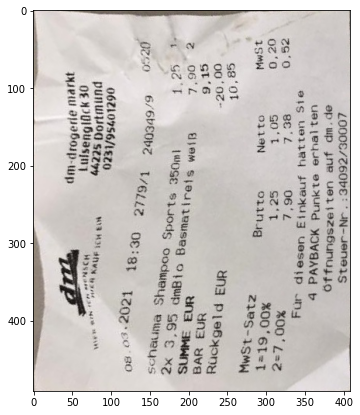

In [12]:
image_bytes = base64.b64decode(res_bird_view['data'])
_ = show_image(io.BytesIO(image_bytes))

# Parse of edited image

In [9]:
res2 = perform_query(BASE_URL_PARSER, 'parse', 'GET', headers=auth_header, data={"image": res_bird_view['data']})
res2['data'].pop('raw_text')
pprint(res2)

{'data': {'amount': 915,
          'amountexvat': 843,
          'date': '2021-03-08T00:00:00',
          'hash': '318f23f7-fec8-4419-950a-e5eb2850451b',
          'merchant_name': 'DM',
          'rotation': 86}}
